# **Abstract**

We are trying to determine the price range of a mobile phone depending on different parameters such as the ram, storage, camera megapixels, etc.

**Describing the features in the dataset**

battery_power: This denotes the battery power of the mobile

blue: This tels if the mobile has bluetooth or not

clock_speed: This denotes the clock speed of the mobile

dual_sim: This tells if the mobile has dual sim or not

fc: This denotes the front camera capacity of the mobile

four_g: This tells if the mobile has 4G or not

int_memory: This denotes the internal memory capacity of the mobile

m_dep: This denotes the mobile depth

mobile_wt: This denotes the mobile weight

n_cores: This denotes the number of cores the mobile has

pc: This denotes the primary camera capacity of the mobile

px_height: This denotes the pixel height in the mobile

px_width: This denotes the pixel width in the mobile

ram: This denotes the ram capacity of the mobile

sc_h: This denotes the screen height

sc_w: This denotes the screen width

talk_time: This denotes the talk time of the mobile

three_g: This tells if the mobile has 3G or not

touch_screen: This tells if the mobile has touch screen or not

wifi: This tells if the mobile has wifi or not

price_range: This is the target variable, depending on all the other variables, it tells the price range of the mobile either in 1, 2, or 3

# Importing Libraries

In [65]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [66]:
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from scipy.stats import pearsonr
from statsmodels.stats.outliers_influence import variance_inflation_factor
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [67]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,4 hours 20 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.1
H2O_cluster_version_age:,20 days
H2O_cluster_name:,H2O_from_python_unknownUser_bj4cj5
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.952 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


# Importing Data

In [68]:
train = "https://raw.githubusercontent.com/kmehul/Data-Science/main/Datasets/train.csv"
df = pd.read_csv(train)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [70]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [71]:
#Checking if the dataset has any null values

df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

As we can see, there are no null values in the dataset.

# Checking the correlation among all the features in the dataset

**Using corrleation matrix**

In [72]:
df.drop('price_range', axis=1).corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,-0.009952,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,-0.017143,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,-0.005598,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964


**Creating a heatmap for the correlation matrix**

<AxesSubplot:>

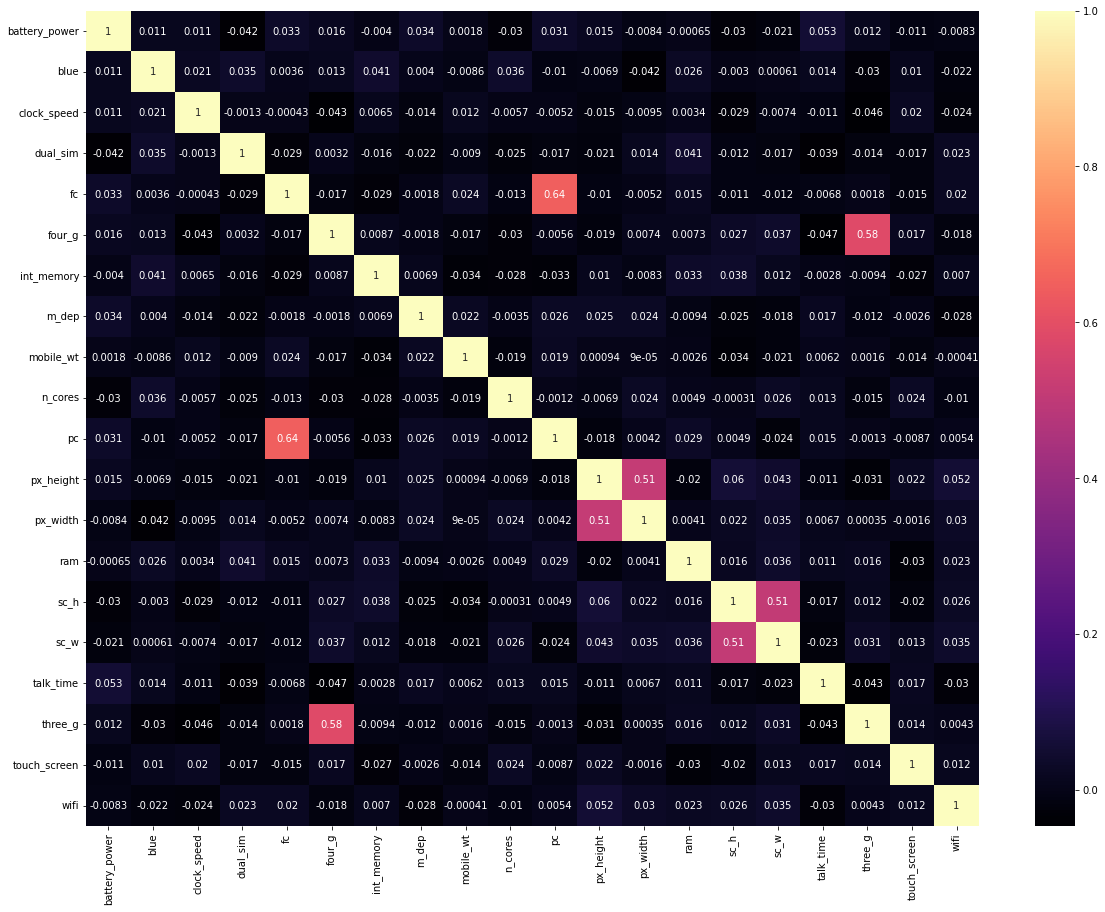

In [73]:
#Excluding the target variable


plt.figure(figsize=(20,15))
sns.heatmap(df.drop('price_range', axis=1).corr(), annot=True, cmap='magma')

As we can see from the above heatmap, there seems to be correlation among almost all the independent variables.

However, the most significant correlated variables are:-

1. pc and fc
2. three_g and four_g
3. px_height and px_width
4. sc_h and sc_w

**Using Variance Inflation Factor (VIF) for multi- collinearity check**

Here, we are going to check for multi-collinearity among the predictor variables

In [74]:
# Extract predictor variables
X = df.drop('price_range', axis=1)

# Compute VIF values for each predictor variable
vif = pd.DataFrame()
vif["feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print results
print(vif)

          feature        VIF
0   battery_power   8.076717
1            blue   1.981927
2     clock_speed   4.260479
3        dual_sim   2.015006
4              fc   3.413529
5          four_g   3.194321
6      int_memory   3.961239
7           m_dep   3.911115
8       mobile_wt  12.972548
9         n_cores   4.646070
10             pc   6.228797
11      px_height   4.262680
12       px_width  11.766282
13            ram   4.688608
14           sc_h  11.510780
15           sc_w   3.720867
16      talk_time   4.859144
17        three_g   6.191783
18   touch_screen   1.989078
19           wifi   2.021012


In the above result, we can see that there is multi-collinearity among all the predictor variables.

However, the most significant multi-collinearity exists with:-

1. mobile_wt
2. px_width
3. sc_h

But in our case, dropping those variables is not possible as it will result in a loss in the training data.

**Using L2 regularization to treat multi-collinearity and thus avoiding overfitting of the data**

In [75]:
# Define the target variable and the predictor variables
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

#Spliting data into Training 70%, Test set 30%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Fit the Ridge logistic regression model
ridge = RidgeClassifier(alpha=0.5)
ridge.fit(X_train, y_train)

# rmse after regularization
y_pred = ridge.predict(X_test)

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse

0.67700320038633

# Calculating predictor target relationship

**Using Random Forest**

In [76]:
# Separate the target (dependent) variable
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

# Get the feature importances from the classifier
importances = clf.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 13 (0.479762)
2. feature 0 (0.075640)
3. feature 12 (0.056920)
4. feature 11 (0.056710)
5. feature 8 (0.039629)
6. feature 6 (0.035723)
7. feature 16 (0.030314)
8. feature 2 (0.029414)
9. feature 10 (0.029307)
10. feature 14 (0.028000)
11. feature 15 (0.027885)
12. feature 9 (0.024208)
13. feature 7 (0.024065)
14. feature 4 (0.023834)
15. feature 18 (0.007247)
16. feature 1 (0.006904)
17. feature 3 (0.006745)
18. feature 5 (0.006348)
19. feature 19 (0.006243)
20. feature 17 (0.005103)


Thus, we can say that ram is the most significant predictor variable.

# Initializing AutoML

In [78]:
# Converted Pandas Dataframe to H2O dataframe to proceed with AutoML
data = h2o.H2OFrame(df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [79]:
#Checking H2O Dataframe Data Types
data.types

{'battery_power': 'int',
 'blue': 'int',
 'clock_speed': 'real',
 'dual_sim': 'int',
 'fc': 'int',
 'four_g': 'int',
 'int_memory': 'int',
 'm_dep': 'real',
 'mobile_wt': 'int',
 'n_cores': 'int',
 'pc': 'int',
 'px_height': 'int',
 'px_width': 'int',
 'ram': 'int',
 'sc_h': 'int',
 'sc_w': 'int',
 'talk_time': 'int',
 'three_g': 'int',
 'touch_screen': 'int',
 'wifi': 'int',
 'price_range': 'int'}

In [80]:
# Setting up the data split between training and test dataset
pct_rows = 0.80  
data_train, data_test = data.split_frame([pct_rows])

In [85]:
# Define the target variable and the predictor variables
y = 'price_range'
X = data.columns
X.remove(y)

In [87]:
# Initializing AutoML
run_time = 600
aml = H2OAutoML(max_models=10, max_runtime_secs=run_time, seed=1) 

In [88]:
# Training the train data on various models
aml.train(x=X, y=y, training_frame=data_train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),10/10
# GBM base models (used / total),4/4
# XGBoost base models (used / total),3/3
# DRF base models (used / total),2/2
# GLM base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [89]:
# Leaderboard showing the performance of different models on the dataset
print(aml.leaderboard)

model_id                                                    rmse        mse       mae     rmsle    mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_2_20230301_33845     0.275255  0.0757654  0.209881  0.136668                 0.0757654
StackedEnsemble_BestOfFamily_1_AutoML_2_20230301_33845  0.276845  0.0766432  0.212173  0.13844                  0.0766432
GBM_3_AutoML_2_20230301_33845                           0.289834  0.0840035  0.218832  0.145828                 0.0840035
GBM_1_AutoML_2_20230301_33845                           0.293936  0.0863985  0.24203   0.153101                 0.0863985
GBM_4_AutoML_2_20230301_33845                           0.295551  0.0873506  0.225495  0.148144                 0.0873506
GBM_2_AutoML_2_20230301_33845                           0.295563  0.0873573  0.226687  0.146172                 0.0873573
XGBoost_3_AutoML_2_20230301_33845                       0.308086  0.0949172  0.229965  0.149296                 0.0949172
XGBoost_2_AutoML_2_20230

In [90]:
# Checking out the best model
best_model = aml.leader
best_model.model_performance(data_test)

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 0.06743069823547561
RMSE: 0.25967421557689474
MAE: 0.19418460316454467
RMSLE: 0.13359075048397404
Mean Residual Deviance: 0.06743069823547561
R^2: 0.9491988741240849
Null degrees of freedom: 397
Residual degrees of freedom: 387
Null deviance: 530.1793038040767
Residual deviance: 26.837417897719295
AIC: 80.20642170496032

As we can see above, in the above best model, the R squared is very close to 1. Which means this truly is the best model.

In [99]:
# Checking the algorithm for the best model
best_model.algo

'stackedensemble'

# Variable importance

Since our best model is stackedensemble, it does not have a variable importance plot or details.

# Questions

1. Is the relationship significant?

Ans: Yes, since most of the predictor variables are correlated which has been signified by the high amount of correlation coefficient.

2. Are any model assumptions violated?

Ans: Since the target variable is a classification variable, hence, no assumptions have been violated.

3. Is there any multicollinearity in the model?

Ans: Yes, since it was verified by using VIF, we can say that there is significance correlation that exists for some predictor variables, but no predictor variable has zero correlation.

4. In the multivariate models are predictor variables independent of all the other predictor variables?

Ans: No, since we have verified this with the help of VIF, Correlation Matrix and it's heatmap.

5. In multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

Ans: The most significant predictor variable is ram, which we confirmed with the help of random forest tree. However, we cannot exclude insignificant variables from the model as even they have some relation with the target variable and removing them will adversely affect the training model.

6. Does the model make sense?

Ans: Yes, the AutoML does a good job in decently predicting the model.

7. Does regularization help?

Ans: No, regularization did not help as after regularization, there was an increase in the root mean squared error, which tells us that the model was better off before regularization.

8. Which independent variables are significant?

Ans: The most significant variable is ram. However, the top 5 significant variables are listed below:-

    1. ram
    2. battery_power
    3. px_width
    4. px_height
    5. mobile_wt

9. Which hyperparameters are important?

Ans: I believe that every hyperparameter is important because they tell us if our model is good, bad, underfitting or overfitting.

# Conclusion

In conclusion:-

    1. StackedEnsemble is the best model for our Dataset.
    2. Ram is the most significant predictor variable, however, there are some other important ones as well.
    3. Our Data is better without regularization.

# Referenes

1. https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/AutoML_Smoke_Detection_Example.ipynb

2. https://colab.research.google.com/drive/16xWSWafMxXx_N96KYpRXkOUdBy_s42Ow#scrollTo=nSY48TVM9BVN (This is my assignment 1)

3. https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/AutoML_Wine_Quality.ipynb

4. https://towardsdatascience.com/automated-machine-learning-with-h2o-258a2f3a203f


All code in this note is available as open source through the MIT license.

All text and images are free to use under the Creative Commons Attribution 3.0 license. https://creativecommons.org/licenses/by/3.0/us/

These licenses let others distribute, remix, tweak, and build upon the work, even commercially, as long as they give credit for the original creation.

Copyright(c) 2023 Kumar Mehul

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.